**PROBABILITY FOR DATA SCIENCE: Project 3, Random Assignment Problem**

*ABSTRACT:* The random assignment problem consists of allocating *n* jobs to an equal number of machines to minimize a random total cost. We aim to estimate the expected cost value associated with the optimal solution.

*OBJECTIVES:* Minimize the total cost *An* for a given *n x n* cost matrix *C* with independent and identically distributed random variables with distribution *U(0,1)* and also estimate the expected cost value *E(An)* as *n* grows large.

**Import the necessary libreries** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Step 1:** Generate the cost matrix

Generate a *n x n* matrix where each element *c(i,j)* is a random number with uniform distribution *U(0,1)*

In [11]:
def cost_matrix(n):
    return np.random.uniform(0, 1, (n,n))

**Step 2:** Create the total cost function

Create a function to calculate the total cost for a given permutation of the cost matrix.

In [12]:
def total_cost(cost_matrix, permutation):
    return sum(cost_matrix[i, permutation[i]] for i in range(len(permutation)))

**Step 3:** Define the Metropolis-Hastings algorithm with history of costs

Implement the Metropolis-Hastings algorithm by including permutation and cost tracking

In [13]:
def metropolis_hastings_with_history(cost_matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)  #length of the permutation (number of elements to permute)
    permutations = [initial_permutation.copy()] #initialize the list of permutations with the initial permutation
    costs = [total_cost(cost_matrix, initial_permutation)] #initialize the list of costs with the cost of the initial permutation
    
    for t in range (1, steps):
        next_permutation = np.random.permutation(n) #generate a new random permutation
        new_cost = total_cost(cost_matrix, next_permutation) #calculate the cost of the new permutation
        acceptance_probability = np.exp(beta * (costs[t - 1] - new_cost)) #calculate the acceptance probability using the Metropolis - Hastings criterion
        
        if(np.random.uniform(0,1) < min(1, acceptance_probability)): #if the permutation is accepted
            permutations.append(next_permutation) #append the new permutation and its cost to the lists
            costs.append(new_cost)
        else:
            permutations.append(permutations[t - 1]) #if the permutation is not accepted, append the previous permutation and cost to the lists
            costs.append(costs[t - 1])
    
    return permutations, costs

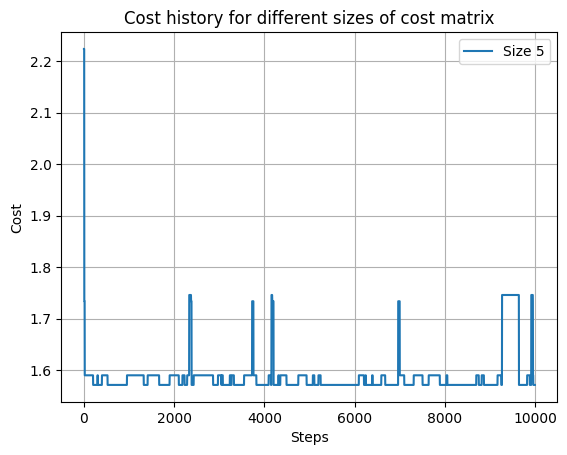

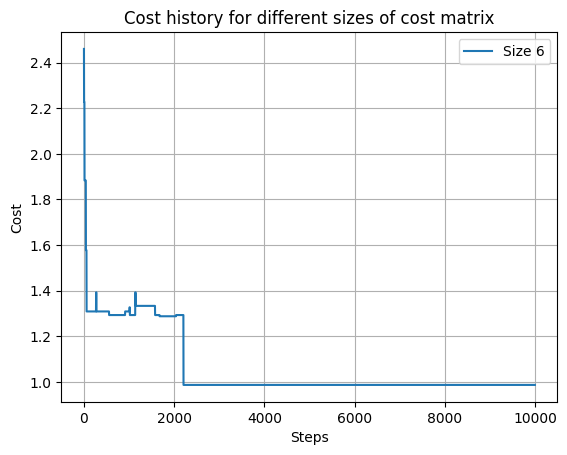

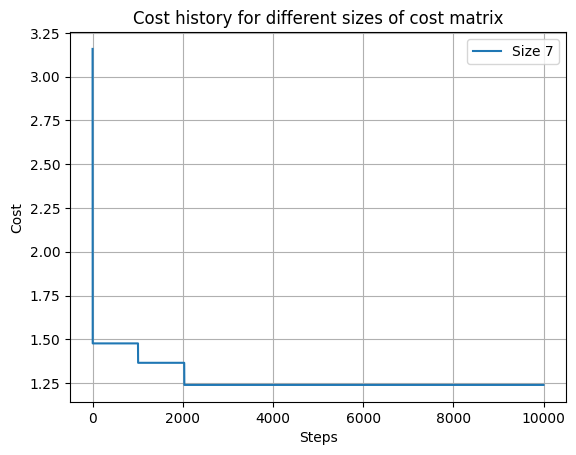

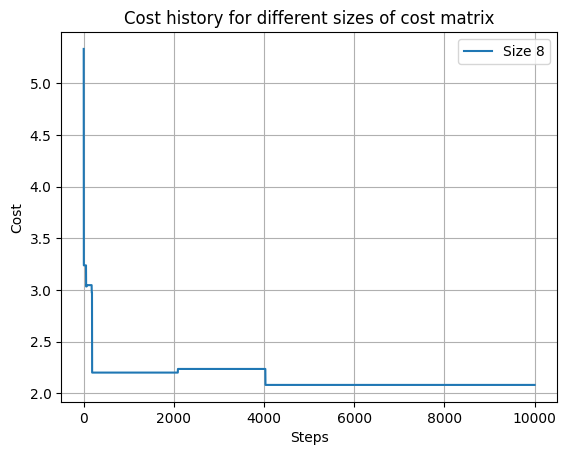

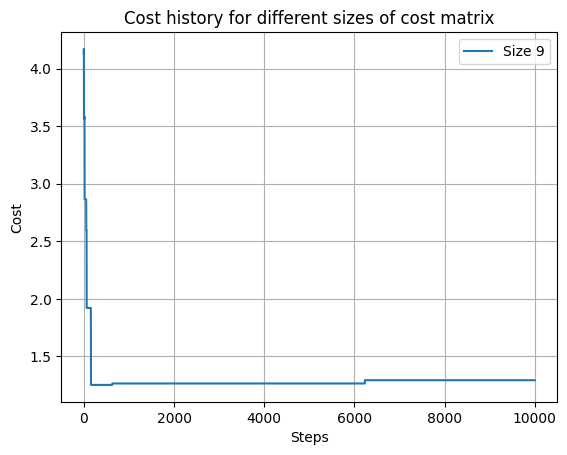

In [14]:
# Define the range of sizes for the cost matrix according to the formula n = 5α
#dimensions = [5 * alpha for alpha in range(1, 11)]
dimensions = range(5,10)
beta = 20  # Beta parameter for the Metropolis-Hastings algorithm
steps = 10000  # Number of steps for each Metropolis-Hastings simulation

# Perform the analysis and plot the results for Metropolis-Hastings with history
for n in dimensions:
    matrix = cost_matrix(n)  # Generate a cost matrix of size n
    initial_permutation = np.random.permutation(n)  # Generate a random initial permutation of indices from 0 to n - 1
    _, costs = metropolis_hastings_with_history(matrix, beta, initial_permutation, steps)  # Run the Metropolis-Hastings algorithm and obtain the cost history
    plt.plot(range(steps), costs, label=f'Size {n}')
    plt.xlabel('Steps')
    plt.ylabel('Cost')
    plt.title('Cost history for different sizes of cost matrix')
    plt.legend()
    plt.grid(True)
    plt.show()

**Step 4:** Define the Metropolis-Hastings algorithm without history.

Implement the Metropolis-Hastings algorithm by including only the final permutation and cost

In [15]:
def metropolis_hastings_without_history(matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)
    permutation = initial_permutation.copy()
    cost = total_cost(matrix, initial_permutation) #calculate initial total cost
    
    for t in range(1, steps):
        next_permutation = np.random.permutation(n) #generate a random neighboring permutation
        new_cost = total_cost(matrix, next_permutation) #calculate the total cost of the new permutation
        acceptance_probability = np.exp(beta * (cost - new_cost)) #calculate acceptance probability
       
        if np.random.uniform(0, 1) < min(1, acceptance_probability): #accept or reject the new permutation based on acceptance probability
            permutation = next_permutation
            cost = new_cost
    
    return permutation, cost

**Step 5:** Estimating the value of E(An) and displaying the results

In [16]:
#Parameters:
beta = 20 #parameter for the Metropolis-Hastings algorithm
steps = 10000 #number of steps for each simulation
M = 100 #number of independent realizations for each simulation
#dimensions = [5 * alpha for alpha in range(1,11)] #different size for the cost matrix
dimensions = range(5,10)

estimated_costs = [] #list to store estimated costs for each matrix size
for n in dimensions:
    costs = []
    for _ in range(M):
        matrix = cost_matrix(n) #generate a cost matrix of size n
        initial_permutation = np.random.permutation(n) #generate a random initial permutation of indices from 0 to n - 1
        _, cost = metropolis_hastings_without_history(matrix, beta, initial_permutation, steps) #run the Metropolis - Hastings algorithm
        costs.append(cost) #store the cost 
    E_An = np.mean(costs) #calculate the average cost
    estimated_costs.append(E_An)

In [17]:
print(f"Dimension: {n}")
print(f"E(A_n): {E_An}")

Dimension: 9
E(A_n): 1.6641407224542513


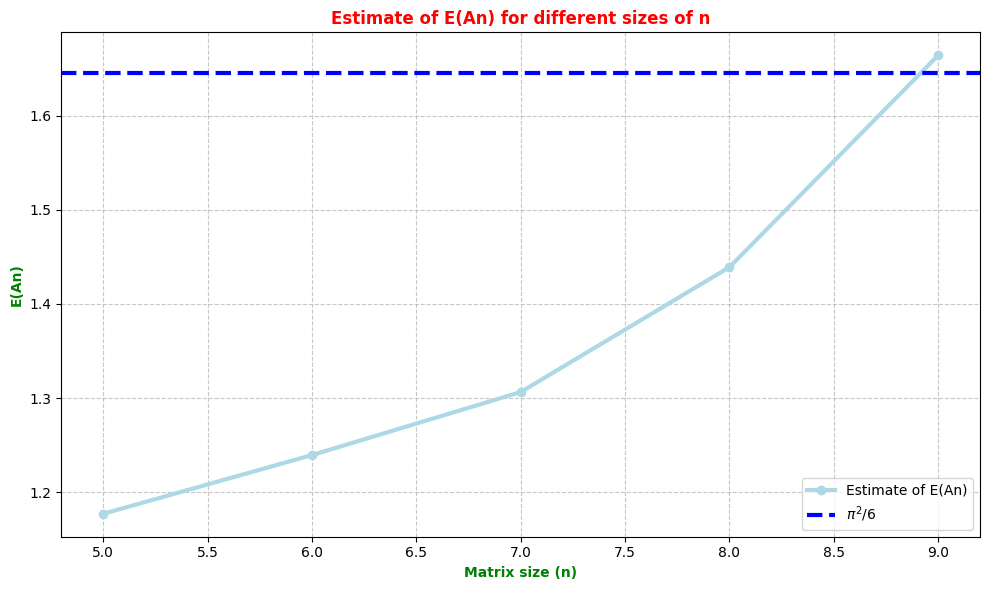

In [19]:
#plot the results
plt.figure(figsize=(10,6))
plt.plot(dimensions, estimated_costs, color = 'lightblue', linestyle = '-', linewidth = 3, marker = 'o', markersize = 6, label = 'Estimate of E(An)')
plt.axhline(y = np.pi**2 / 6, color = 'blue', linestyle = '--', linewidth = 3, label = r'$\pi^2 / 6$')
plt.title('Estimate of E(An) for different sizes of n', fontweight = 'bold', color = 'red')
plt.xlabel('Matrix size (n)', fontweight = 'bold', color = 'green')
plt.ylabel('E(An)', fontweight = 'bold', color = 'green')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()